In [4]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import sklearn 

In [5]:
daty=pd.read_csv('phase3.csv')

In [6]:
daty.drop('num_outbound_cmds',axis=1,inplace=True)

In [7]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
daty['protocol_type'] = label_encoder.fit_transform(daty['protocol_type'])
daty['service'] = label_encoder.fit_transform(daty['service'])
daty['flag'] = label_encoder.fit_transform(daty['flag'])

In [8]:
from sklearn.preprocessing import MinMaxScaler
scalee=MinMaxScaler()
sc=scalee.fit_transform(daty)
sc=pd.DataFrame(sc,columns=daty.columns)

In [9]:
bgraphy=sc.T.values
from scipy.spatial.distance import pdist 
distance=pdist(bgraphy)
from scipy.cluster.hierarchy import dendrogram, linkage 
graphy=linkage(distance,'ward')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [35.0, 35.0, 60.0, 60.0],
  [12.5, 12.5, 47.5, 47.5],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [305.0, 305.0, 315.0, 315.0],
  [325.0, 325.0, 335.0, 335.0],
  [310.0, 310.0, 330.0, 330.0],
  [295.0, 295.0, 320.0, 320.0],
  [272.5, 272.5, 307.5, 307.5],
  [255.0, 255.0, 290.0, 290.0],
  [245.0, 245.0, 272.5, 272.5],
  [235.0, 235.0, 258.75, 258.75],
  [225.0, 225.0, 246.875, 246.875],
  [215.0, 215.0, 235.9375, 235.9375],
  [205.0, 205.0, 225.46875, 225.46875],
  [195.0, 195.0, 215.234375, 215.234375],
  [185.0, 185.0, 205.1171875, 205.1171875],
  [175.0, 175.0, 195.05859375, 195.05859375],
  [165.0, 165.0, 185.029296875, 185.0292

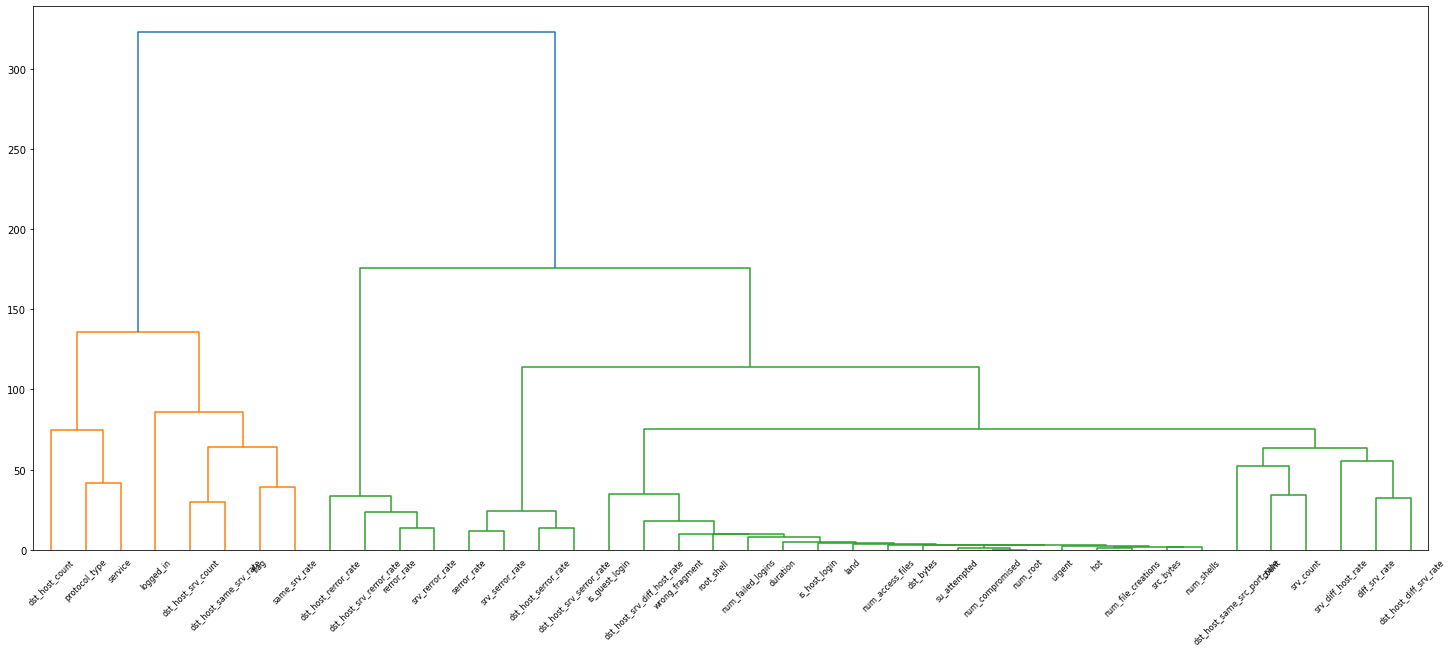

In [10]:
figy=plt.figure(figsize=(25,10))
dendrogram(graphy,labels=sc.columns)

In [11]:
sc.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.000000,0.5,0.714286,0.1,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,...,1.000000,0.039216,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0.000000,0.5,0.714286,0.1,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,...,1.000000,0.003922,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,0.000035,0.5,0.301587,0.9,2.066513e-04,0.000000,0.0,0.0,0.0,0.0,...,0.525490,0.337255,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0.000000,0.0,0.206349,0.9,3.183413e-07,0.000000,0.0,0.0,0.0,0.0,...,0.011765,0.223529,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,0.000017,0.5,0.873016,0.2,0.000000e+00,0.000011,0.0,0.0,0.0,0.0,...,0.113725,0.337255,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [12]:
from sklearn.cluster import AgglomerativeClustering
